In [1]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [18]:
# Correlator specifics
ENSEMBLE = 'Fine-1'
MESON    = 'Dst'
MOMENTUM = '200'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 16
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 0.053

# Specifics of the analysis
TRANGE_EFF = (16,31) 
TRANGE     = (7,31)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [19]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [20]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [21]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.32 [96]    Q = 1    logGBF = 163.62

Parameters:
          const   0.8761 (40)     [ 0.879 (45) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.21 [96]    Q = 1    logGBF = 355.31

Parameters:
('1S-1S', 'Bot')     1.631 (38)      [    1.61 (23) ]  
('1S-1S', 'Par')     1.931 (51)      [    1.94 (43) ]  
 ('d-1S', 'Bot')    0.1253 (23)      [   0.125 (16) ]  
 ('d-1S', 'Par')    0.1401 (29)      [   0.142 (39) ]  
  ('d-d', 'Bot')   0.00945 (15)      [ 0.00946 (49) ]  
  ('d-d', 'Par')   0.01043 (19)      [  0.0106 (24) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


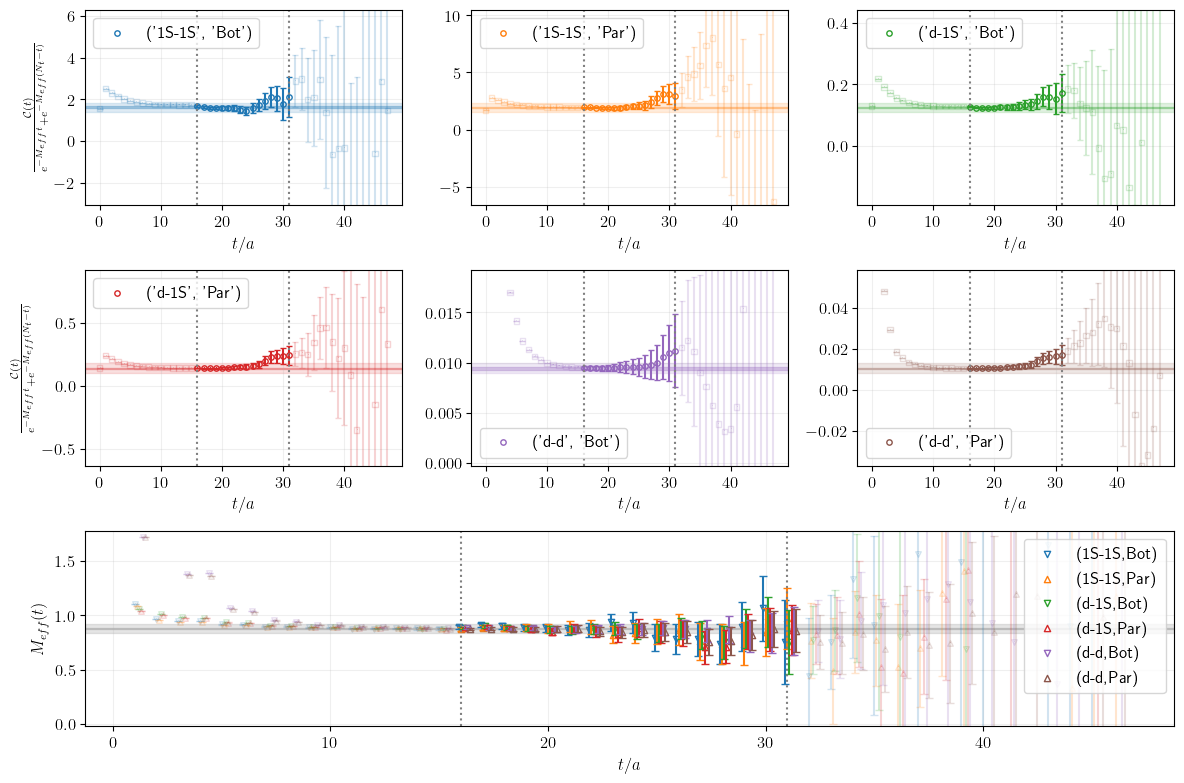

In [22]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.tight_layout()
plt.show()

Here we set priors

In [23]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)

# priors['E'][0] = gv.gvar('0.912(70)')

priors

{'E': [0.876(37), -2.08(58), -1.35(76), -2.6(2.5), -2.6(2.5), -2.6(2.5)],
 'Z_1S_Bot': [0.2(1.2), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [0.3(1.3), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-2.33(79), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-2.28(92), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [24]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (7, 31) for mes: Dst of ens: Fine-1 for mom: 200 --------------
Least Square Fit:
  chi2/dof [dof] = 0.31 [150]    Q = 1    logGBF = 2989.8

Parameters:
            E 0     0.8748 (36)      [ 0.876 (37) ]  
              1      -2.94 (36)      [ -2.08 (58) ]  *
              2      -1.43 (46)      [ -1.35 (76) ]  
              3      -2.77 (58)      [ -2.6 (2.5) ]  
              4      -1.79 (91)      [ -2.6 (2.5) ]  
              5      -1.14 (30)      [ -2.6 (2.5) ]  
     Z_1S_Bot 0      0.222 (33)      [  0.2 (1.2) ]  
              1      -0.32 (32)      [ -1.2 (1.2) ]  
              2       0.83 (56)      [  0.5 (1.5) ]  
              3       0.66 (31)      [  0.5 (1.5) ]  
              4       0.90 (97)      [  0.5 (3.0) ]  
              5       1.14 (50)      [  0.5 (3.0) ]  
     Z_1S_Par 0      0.284 (34)      [  0.3 (1.3) ]  
              1      -0.40 (17)      [ -1.2 (1.2) ]  
              2       1.02 (56)      [  0.5 (1.5) ]  
              

In [25]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (7, 31) for mes: Dst of ens: Fine-1 for mom: 200 --------------
Least Square Fit:
  chi2/dof [dof] = 0.31 [150]    Q = 1    logGBF = 2989.8

Parameters:
            E 0     0.8748 (36)      [ 0.876 (37) ]  
              1      -2.94 (36)      [ -2.08 (58) ]  *
              2      -1.43 (46)      [ -1.35 (76) ]  
              3      -2.77 (58)      [ -2.6 (2.5) ]  
              4      -1.79 (91)      [ -2.6 (2.5) ]  
              5      -1.14 (30)      [ -2.6 (2.5) ]  
     Z_1S_Bot 0      0.222 (33)      [  0.2 (1.2) ]  
              1      -0.32 (32)      [ -1.2 (1.2) ]  
              2       0.83 (56)      [  0.5 (1.5) ]  
              3       0.66 (31)      [  0.5 (1.5) ]  
              4       0.90 (97)      [  0.5 (3.0) ]  
              5       1.14 (50)      [  0.5 (3.0) ]  
     Z_1S_Par 0      0.284 (34)      [  0.3 (1.3) ]  
              1      -0.40 (17)      [ -1.2 (1.2) ]  
              2       1.02 (56)      [  0.5 (1.5) ]  
            

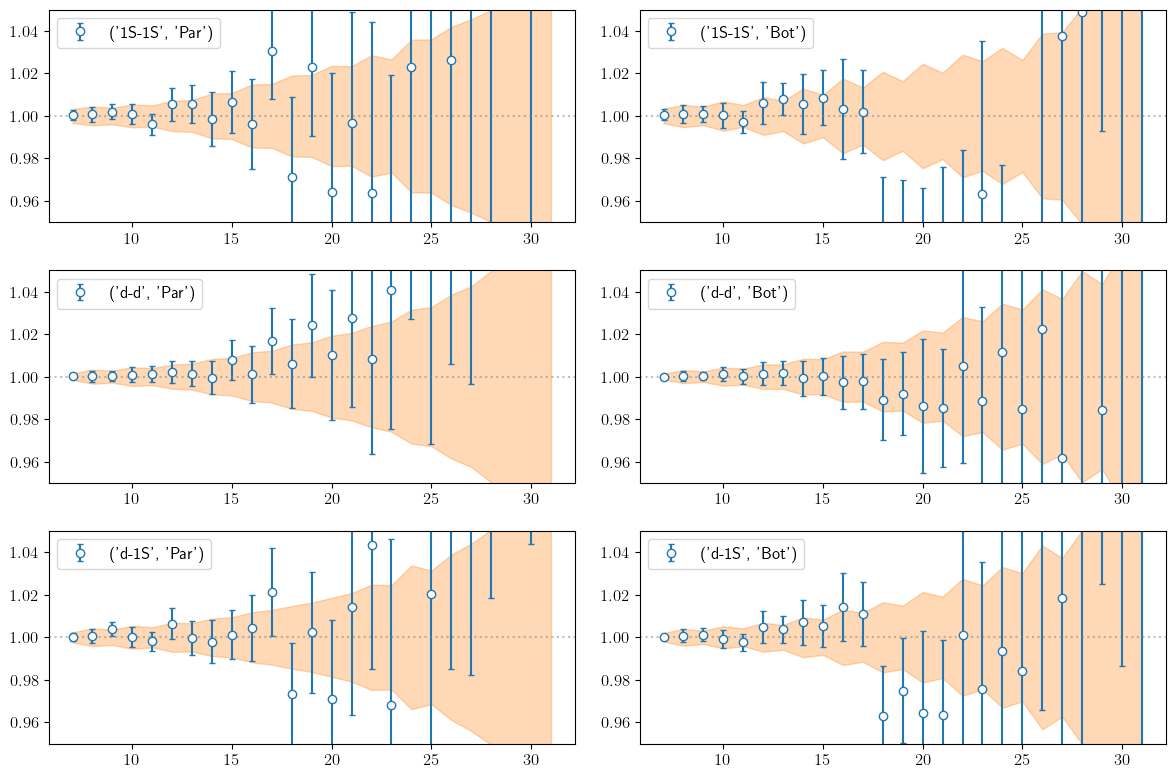

In [26]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()

In [102]:
from b2heavy.TwoPointFunctions.utils import p_value

chi2  = float(fitres['chi2'])
nconf = stag.data.shape[-2]
ndof  = len(fit.y) - sum([len(priors[k]) for k in priors]) 

p_value(chi2,1017,ndof)

0.9608811156493061